## 자전거 공유시스템 수요 예측

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 설명 및 불러오기
+ 날짜 - 시간당 날짜 + 타임 스탬프  
+ 계절 - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
+ 휴일 - 그 날이 휴일로 간주 여부
+ 평일 - 휴일 또는 휴가가 아닌 날
+ 날씨
    + 1 : 맑음, 약간 구름, 부분적으로 흐림, 부분적으로 흐림
    + 2 : 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간의 구름, 안개
    + 3 : 약한 눈, 약한 비 + 뇌우 + 흩어진 구름, 약한 비 + 흩어진 구름
    + 4 : 폭우 + 얼음 깔판 + 뇌우 + 미스트, 눈 + 안개 
+ 온도 - 섭씨 온도
+ 습도 - 상대 습도
+ 풍속- 풍속
+ 캐주얼 - 비 등록 사용자 대여 횟수 개시
+ 등록 - 등록 된 사용자의 번호 렌털 개시
+ 카운트 - 렌털 총 개수

In [297]:
# datetime 형태로 불러오기
test_df = pd.read_csv("C:/Data/bike/test.csv", parse_dates=["datetime"])
train_df = pd.read_csv("C:/Data/bike/train.csv",parse_dates=["datetime"])

In [298]:
# 데이터 합치기
all_df = pd.concat((train_df,test_df),axis = 0).reset_index()
all_df.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [300]:
# train,test 인덱스 설정
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df),len(all_df)))

In [301]:
# 결측값 확인
# train에만 있고 test에는 없는 casual, registered, count 의 결측값 확인
all_df.isnull().sum()

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

### 성과지표

In [302]:
# np.nan_to_num()
x = np.array([np.inf, - np.inf, np.nan, -128,128])
np.nan_to_num(x)

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [303]:
# 성과지표 rmsle생성
def rmsle(y,y_):
    log1 = np.nan_to_num(np.log(y+1))
    log2 = np.nan_to_num(np.log(y_+1))
    calc = (log1 - log2)**2
    return np.sqrt(np.mean(calc))

In [304]:
# 제출형식 확인
submission_df = pd.read_csv("C:/Data/bike/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [305]:
# 성과지표 함수 작동 확인
rmsle(submission_df["count"].values,
      np.random.randint(0,100,size=len(submission_df)))

3.7488274242979758

In [306]:
# casual, registered, index 제거
del all_df["casual"]
del all_df["registered"]
del all_df["index"]

In [307]:
# 원핫인코딩(더미변수 생성)
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"),
                     left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [308]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"),
                     left_index=True,right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


In [309]:
# 시간별 중복 데이터 확인
len(pre_df["datetime"].unique())

17379

In [310]:
# 시간별 변수 생성
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.dayofweek

In [311]:
pre_df = pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"),
                     left_index=True,right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [312]:
# 데이터 타입 확인
pre_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1               uint8
season_2               uint8
season_3               uint8
season_4               uint8
weather_1              uint8
weather_2              uint8
weather_3              uint8
weather_4              uint8
year                   int64
month                  int64
day                    int64
hour                   int64
weekday                int64
weekday_0              uint8
weekday_1              uint8
weekday_2              uint8
weekday_3              uint8
weekday_4              uint8
weekday_5              uint8
weekday_6              uint8
dtype: object

In [313]:
# category 형태로 타입변경
category_variable_list = ["season","weather","workingday",
                         "season_1","season_2","season_3","season_4",
                         "weather_1","weather_2","weather_3","weather_4",
                         "year","month","day","hour","weekday",
                         "weekday_0","weekday_1","weekday_2","weekday_3","weekday_4",
                         "weekday_5","weekday_6",]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")

In [314]:
pre_df.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [315]:
# train데이터 설정
train_df = pre_df.iloc[train_index]

KeyboardInterrupt: 

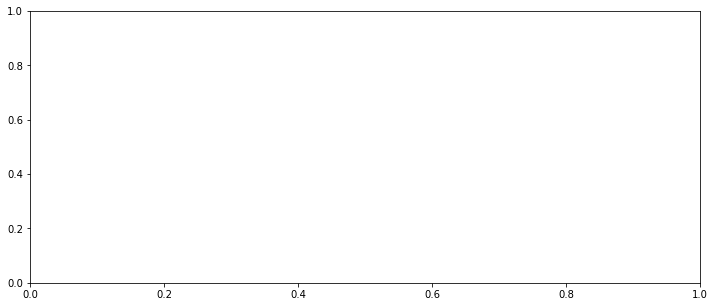

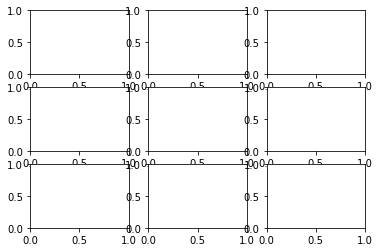

In [255]:
# 변수별 수요 막대 그래프
fig, ax = plt.subplots()
train_dffig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12,5)
axes[0][0].bar(train_df["year"],train_df["count"])
axes[0][1].bar(train_df["weather"],train_df["count"])
axes[0][2].bar(train_df["workingday"],train_df["count"])
axes[1][0].bar(train_df["holiday"],train_df["count"])
axes[1][1].bar(train_df["weekday"],train_df["count"])
axes[1][2].bar(train_df["month"],train_df["count"])
axes[2][0].bar(train_df["day"],train_df["count"])
axes[2][1].bar(train_df["hour"],train_df["count"])
plt.show()

In [316]:
# 월별 수요 평균 데이터 생성
series_data = train_df.groupby(["month"])["count"].mean()

In [317]:
series_data.index.tolist()[:5]

[1, 2, 3, 4, 5]

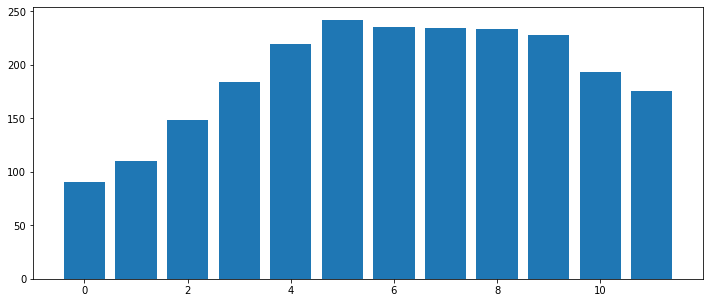

In [318]:
# 월별 수요 평균 막대그래프
fig, ax = plt.subplots()
ax.bar(range(len(series_data)), series_data)
fig.set_size_inches(12,5)
plt.show()

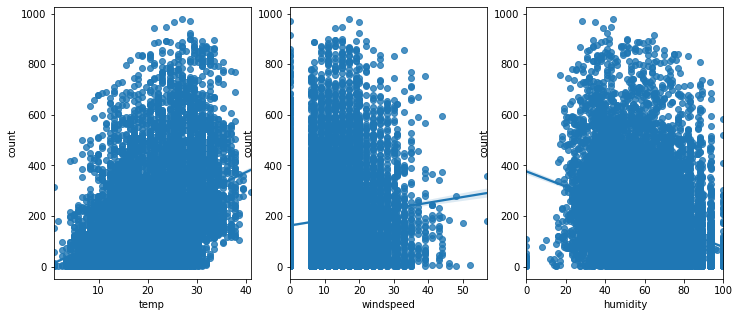

In [183]:
import seaborn as sn

fig,(ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sn.regplot(x="temp",y="count",data=train_df, ax=ax1)
sn.regplot(x="windspeed",y="count",data=train_df, ax=ax2)
sn.regplot(x="humidity",y="count",data=train_df, ax=ax3)
plt.show()

In [319]:
# 변수 리스트 생성
continuous_variable_list = ["temp","humidity","windspeed","atemp"]

season_list = ["season_1","season_2","season_3","season_4"]
weather_list = ["weather_1","weather_2","weather_3","weather_4"]
weekday_list = ["weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
category_variable_list = ["season","holiday","workingday","weather","weekday","month",
                         "year","hour"]

In [320]:
#리스트 합치기
all_variable_list = continuous_variable_list + category_variable_list

all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [321]:
number_of_variables = len(all_variable_list)
number_of_variables

15

In [322]:
len(variable_combinations)

121

In [323]:
# 변수 조합 함수 생성
variable_combinations = []
import itertools
for L in range(13, number_of_variables+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list):
                for value in variable:
                    temp.append(value)
            else:
                temp.append(variable)
        variable_combinations.append(temp)

In [324]:
len(variable_combinations)

121

In [325]:
del pre_df["count"]

In [326]:
# 변수 조합별 선형, 릿지, 라쏘 회귀분석
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf = KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)
        
        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
        
    final_output.append([i, np.mean(lr_result),np.mean(ridge_result),
                        np.mean(lasso_result)])
    models.append([lr,ridge,lasso])
    # 100개 모델마다 걸리는 시간
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf-ts
        print(i,te)
        ts = datetime.datetime.now()

121


<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

0 0:00:00.315039


<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

100 0:01:14.050208


<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8058da04>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_+1))
<ipython-input-303-b47f8

In [327]:
# 분석 결과 데이터프레임 생성
labels = ["combination","lr","ridge","lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df

,combination,lr,ridge,lasso
0,0,1.323217,1.323639,1.306853
1,1,1.320373,1.318342,1.307863
2,2,1.322700,1.321924,1.310925
3,3,1.461802,1.460332,1.436101
4,4,1.468246,1.465935,1.441929
...,...,...,...,...
116,116,1.326554,1.326350,1.305956
117,117,1.326694,1.325083,1.305013
118,118,1.325013,1.324722,1.315003
119,119,1.335947,1.321814,1.304744


In [328]:
# rmsle가 최소인 모델 확인
result_df.min()

combination    0.000000
lr             1.307774
ridge          1.303447
lasso          1.292406
dtype: float64

In [329]:
# 라쏘 모델중 8번째 조합이 가장 최소
result_df["lasso"].sort_values().head()

8      1.292406
14     1.298411
102    1.300448
66     1.302723
68     1.302774
Name: lasso, dtype: float64

In [330]:
# 8번째 변수조합
variable_combinations[8]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [331]:
# 8번째 변수조합으로 test데이터 셋 생성
target_df = pre_df[variable_combinations[8]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 22)

In [332]:
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [333]:
models[8][2]

Lasso()

In [334]:
final_result = models[8][2].predict(X_submission_test)
final_result[final_result < 0] = 0

In [335]:
final_result

array([ 13.52940802,  22.22512722,  29.58033602, ..., 195.31192991,
       212.73625388, 201.89205469])

In [336]:
pre_df.iloc[test_index]["datetime"].head()

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
Name: datetime, dtype: datetime64[ns]

In [337]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission.head()

,datetime,count
10886,2011-01-20 00:00:00,13.529408
10887,2011-01-20 01:00:00,22.225127
10888,2011-01-20 02:00:00,29.580336
10889,2011-01-20 03:00:00,37.033077
10890,2011-01-20 04:00:00,44.388286


In [338]:
df_submission.set_index("datetime").to_csv("submission_lasso_data.csv")